In [ ]:



from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline

from mlxtend.frequent_patterns import apriori,association_rules

from collections import Counter
# from IPython.display import Image

from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#load Dataset
df = pd.read_csv('Groceries_dataset.csv')
df.shape

(38765, 3)

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.Member_number.nunique()

3898

In [ ]:
df.itemDescription.nunique()

167

In [ ]:
df.Date.nunique()

728

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df["itemDescription"].value_counts().head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

In [ ]:
#Creating the baskets

In [ ]:
# Using groupby function to create a basket df, which specifies if an item is bought by particular Member
# for all items and all Members
basket = (df.groupby(['Member_number','itemDescription'])['Date']
          .count()
          .unstack()
          .reset_index()
          .fillna(0)
          .set_index('Member_number')
          )

In [ ]:
basket.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [ ]:
#We are getting the per day transactions (example : 2,4,3) while we just want to know if that particular item is purchased or not
#thus we are encoding units as 1(if purchased) or 0(not purchased)

def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1


basket = basket.applymap(encode_units)
basket.head(10

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Association Rule **Mining**

In [ ]:
# trying out on a sample item
whole_milk_df = basket.loc[basket['whole milk']==1]
whole_milk_df

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
# Applying apriori algorithm for whole_milk_df
frequent_itemsets = apriori(whole_milk_df, min_support=0.15, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.186450,(bottled beer)
1,0.245241,(bottled water)
2,0.152296,(brown bread)
3,0.190370,(canned beer)
4,0.201568,(citrus fruit)
5,0.153415,(domestic eggs)
6,0.157895,(newspapers)
7,0.417693,(other vegetables)
8,0.198768,(pastry)
9,0.189810,(pip fruit)


from matplotlib import pyplot as plt
_df_0['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

In [2]:
# Storing the association rules into rules
whole_milk_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
whole_milk_rules

NameError: name 'association_rules' is not defined

In [1]:
# Sorting the rules on lift and support
whole_milk_rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

NameError: name 'whole_milk_rules' is not defined

In [ ]:
#Trying on the whole dataset

# Creating a new function in which we pass an item name and it returns the items
# which are frequently bought together

def frequently_bought_together(item):

    # df of item passed
    item_df = basket.loc[basket[item]==1]

    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)

    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sorting on lift and support
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

    print('Items frequently bought together with {0}'.format(item))

    # Returning top 6 items with highest lift and support
    return rules['consequents'].unique()[:6]

In [ ]:
# Example 1
frequently_bought_together('salty snack')

Items frequently bought together with salty snack


array([frozenset({'salty snack'}), frozenset({'bottled beer'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

In [ ]:
# Example 2
frequently_bought_together('ice cream')

Items frequently bought together with ice cream


array([frozenset({'beef'}), frozenset({'ice cream'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'butter'}), frozenset({'canned beer'})], dtype=object)

In [ ]:
# Example 3
frequently_bought_together('chewing gum')

Items frequently bought together with chewing gum


array([frozenset({'beef'}), frozenset({'chewing gum'}),
       frozenset({'bottled beer'}), frozenset({'bottled water'}),
       frozenset({'whole milk'}), frozenset({'butter'})], dtype=object)

**Visualization**

In [ ]:
support = whole_milk_rules.support.values
confidence = whole_milk_rules.confidence.values

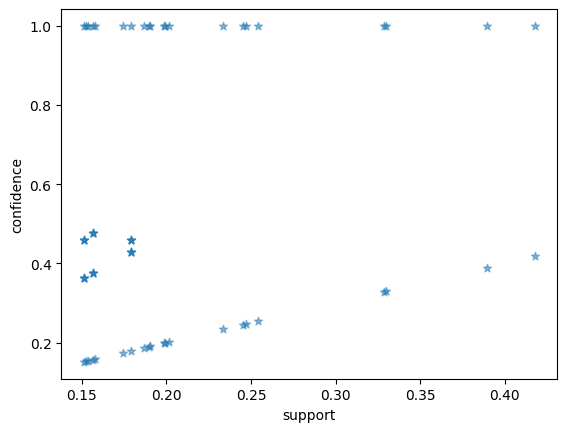

In [ ]:
import matplotlib.pyplot as plt

# Creating a scatter plot of support v confidence
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [ ]:
import networkx as nx

In [ ]:
def visualize_rules(item, no_of_rules, basket):
    # df of item passed
    item_df = basket.loc[basket[item] == 1]

    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)

    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sorting on lift and support
    rules = rules.sort_values(['lift', 'support'], ascending=False).reset_index(drop=True)

    print('Items frequently bought together with {0}'.format(item))

    # Returning top 6 items with highest lift and support
    print(rules['consequents'].head(6).tolist())

    support = rules.support.values
    confidence = rules.confidence.values


    # Creating scatter plot of support vs confidence
    plt.scatter(support, confidence, alpha=0.5, marker="*")
    plt.title('Support vs Confidence graph')
    plt.xlabel('support')
    plt.ylabel('confidence')
    plt.show()

    # Creating a new digraph
    G1 = nx.DiGraph()

    color_map = []
    N = 50
    cmap = plt.get_cmap("viridis", no_of_rules)  # Choose a colormap
    colors = [cmap(i) for i in range(no_of_rules)]

    strs = ['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    # adding as many nodes as the number of rules requested by the user
    for i in range(no_of_rules):
        G1.add_node("R"+str(i))

        # adding antecedents to the nodes
        for a in rules.iloc[i]['antecedents']:
            G1.add_node(a)
            G1.add_edge(a, "R"+str(i), weight=2)

        # adding consequents to the nodes
        for c in rules.iloc[i]['consequents']:
            G1.add_node(c)
            G1.add_edge("R"+str(i), c, weight=2)

    for node in G1.nodes():
        if node in strs:
            color_map.append('yellow')
        else:
            color_map.append('green')

    print('Visualization of Rules')

    weights = [G1[u][v]['weight'] for u, v in G1.edges()]

    pos = nx.spring_layout(G1, k=16, scale=1)

    # Use a colormap for edge colors based on weight
    edge_colors = weights

    nx.draw(G1, pos, node_color=color_map, edge_color=edge_colors, cmap=plt.cm.viridis,
            width=weights, font_size=16, with_labels=False, edge_cmap=plt.cm.Blues)

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

Items frequently bought together with ice cream
[frozenset({'rolls/buns'}), frozenset({'rolls/buns'}), frozenset({'ice cream', 'rolls/buns'}), frozenset({'sausage'}), frozenset({'sausage'}), frozenset({'ice cream', 'sausage'})]


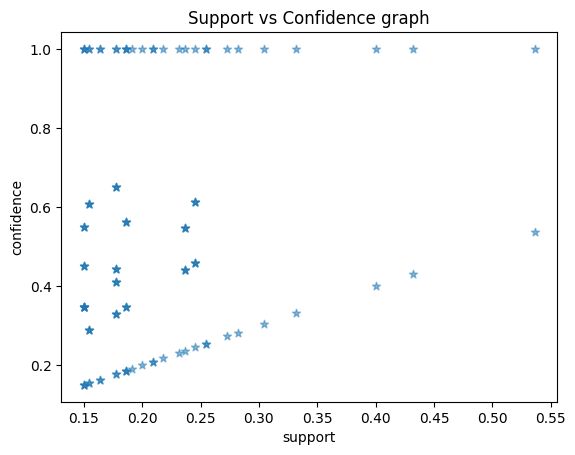

Visualization of Rules


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


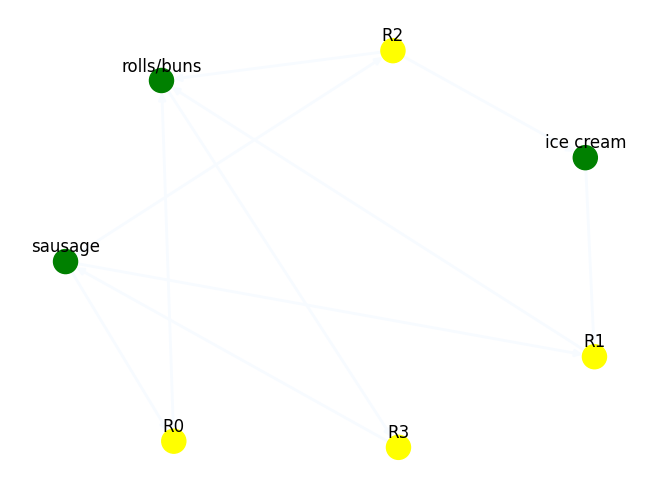

In [ ]:
    visualize_rules('ice cream',4,basket)

Items frequently bought together with chocolate
[frozenset({'whole milk'}), frozenset({'whole milk'}), frozenset({'whole milk', 'chocolate'}), frozenset({'pip fruit'}), frozenset({'pip fruit'}), frozenset({'pip fruit', 'chocolate'})]


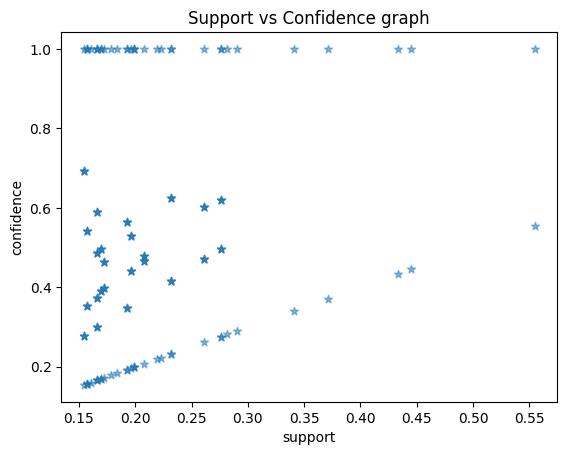

Visualization of Rules


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


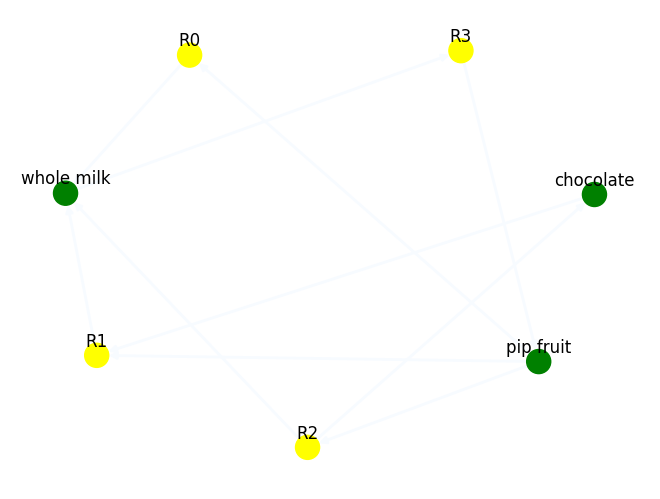

In [ ]:
visualize_rules('chocolate',4,basket)

**Using the code**

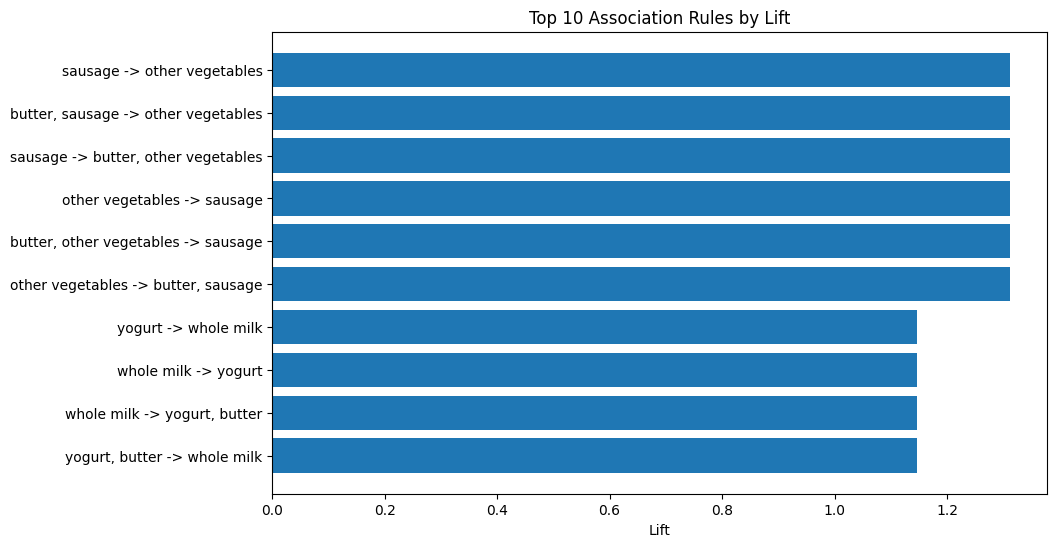

In [ ]:
cat_df = basket.loc[basket['butter']==1]
frequent_itemsets = apriori(cat_df, min_support=0.15, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
top_rules = rules.sort_values(by='lift', ascending=False).head(10)

# Convert frozensets to strings for labeling
top_rules['antecedents_str'] = top_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
top_rules['consequents_str'] = top_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_rules)), top_rules['lift'], tick_label=top_rules['antecedents_str'] + ' -> ' + top_rules['consequents_str'])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()

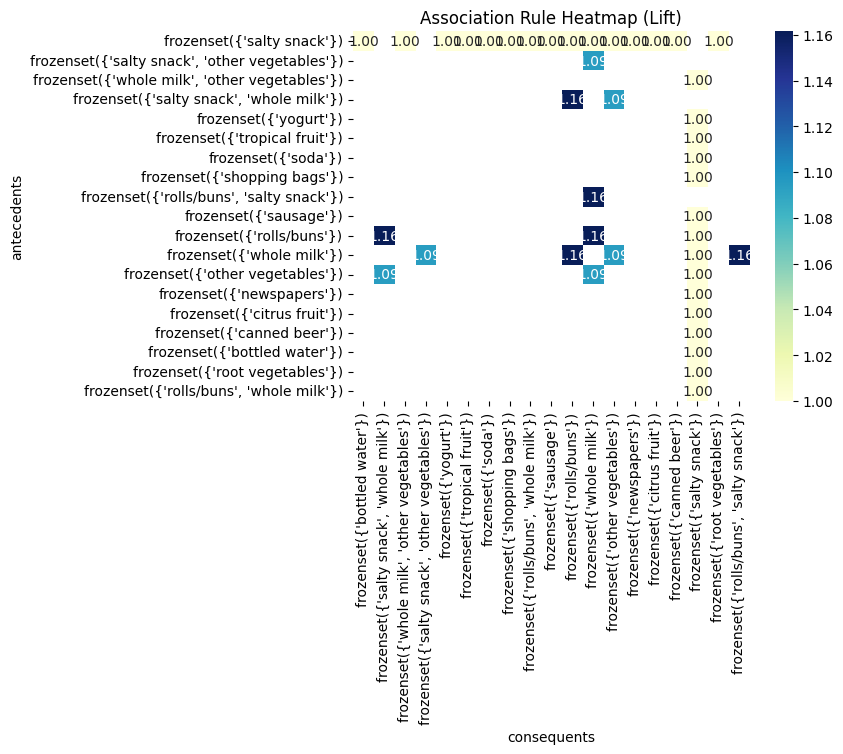

In [ ]:
cat_df = basket.loc[basket['salty snack']==1]
frequent_itemsets = apriori(cat_df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Create a DataFrame for visualization
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Association Rule Heatmap (Lift)')
plt.show()

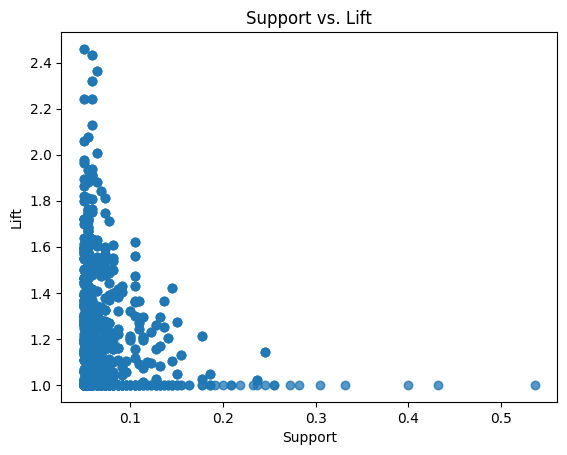

In [ ]:
cat_df = basket.loc[basket['ice cream']==1]
frequent_itemsets = apriori(cat_df, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs. Lift')
plt.show()